In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

directory = os.fsencode('some_data')

full_samples = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.startswith("model"):
        full_samples.append(filename[6:-4])

In [3]:
avail_experiments = sorted(full_samples)
avail_experiments[:5]

['3d1p1o', '4d1p1o', '4d1p2o', '4d2p1o', '5d1p1o']

In [4]:
size = avail_experiments[13]

sample = pd.read_csv(f'some_data/short_{size}.csv')
model = pd.read_csv(f'some_data/model_{size}.csv')

Text(0.5, 0.98, '6d1p4o')

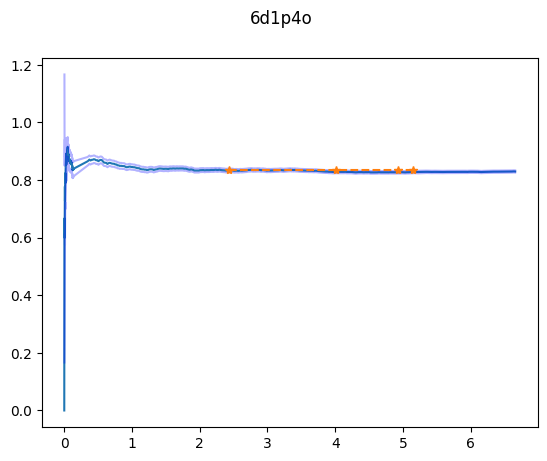

In [5]:
plt.plot(sample.iloc[:,2], sample['mean'],)
plt.plot(sample.iloc[:,2], sample.iloc[:,3], 'b', alpha=0.3)
plt.plot(sample.iloc[:,2], sample.iloc[:,4], 'b', alpha=0.3)
plt.plot(model.iloc[:,1], model.iloc[:,2], '*--')
plt.suptitle(str(size))

In [ ]:
times = pd.read_csv('model_generation_times.csv', index_col=False)
times

In [7]:
d_10 = times[times['d'] == 10].iloc[:,1:]

In [8]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})

In [9]:
new_arr = np.zeros((10, 10))
for line in d_10.iterrows():
  l = line[1]
  new_arr[int(l[0])-1, int(l[1])-1] = l[2]
times = np.round(new_arr, decimals=4)
times[times == 0] = np.nan
times = times[:-2, :-4]
df = pd.DataFrame(times)
df.columns = range(1, 7)
df.index = range(1,9)
df.to_csv('10_doors_gen_time.csv')

In [10]:
df

,1,2,3,4,5,6
1,0.0817,0.4791,5.0567,95.4979,4065.6483,NaN
2,0.2639,0.6384,5.2550,96.8129,4130.3023,NaN
3,0.8090,1.1917,5.8577,103.4114,4063.9781,NaN
4,2.6892,2.4729,7.7749,97.9013,4126.2277,NaN
5,3.4311,3.8398,8.4712,104.1340,NaN,NaN
6,3.5152,3.6031,7.0297,NaN,NaN,NaN
7,2.4241,2.7170,NaN,NaN,NaN,NaN
8,4.7235,NaN,NaN,NaN,NaN,NaN
